# NFL Arrests

* Arrest average per team. - Issac
* Time start vs. number of arrests. - Issac
* Week number vs. number of arrests - Mike - Done
* Home team vs away team - Eric
* division game vs non division game - Eric
* Blowout vs. close game (Overtime is always close game) - Eric - 

* Teams that routinely have many arrests. (counts that are data outliers) - Mike - Done

####  Little more challenging
* Check by town population: maybe just the popular cities are wild - Mike
* Team average vs number of arrests - Mike
* Avg win/loss by timeframe - Issac

# Important Notes:
### Teams Missing
* St. Louis
* Cleveland
* Buffalo
* Atlanta
* New Orleans
* Minnesota
* Detroit (Has Scores in the dataset though.)

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [50]:
nfl_arrests = pd.read_csv('ArrestSet.csv')

In [51]:
# Clean data of any games without arrest data. 
nfl_arrests = nfl_arrests.loc[nfl_arrests['arrests'].isnull() == False]

In [52]:
nfl_arrests[nfl_arrests['arrests'] > 50]

,season,week_num,day_of_week,gametime_local,home_team,away_team,home_score,away_score,OT_flag,arrests,division_game
739,2012,11,Sunday,8:20:00 PM,Pittsburgh,Baltimore,10,13,NaN,52.0,y
744,2013,3,Sunday,8:30:00 PM,Pittsburgh,Chicago,23,40,NaN,56.0,n
771,2011,10,Thursday,5:20:00 PM,San Diego,Oakland,17,24,NaN,69.0,y
782,2012,17,Sunday,1:25:00 PM,San Diego,Oakland,24,21,NaN,60.0,y


In [53]:
# Find out which teams did not provide arrest information

home_list = nfl_arrests.home_team.unique()
away_list = nfl_arrests.away_team.unique()

no_home = []
for team in away_list:
    if team not in home_list:
        no_home.append(team)

no_home

['St. Louis',
 'Cleveland',
 'Buffalo',
 'Detroit',
 'Atlanta',
 'New Orleans',
 'Minnesota']

In [54]:
nfl_arrests.groupby('season').mean()

,week_num,home_score,away_score,arrests
season,,,,
2011,9.094241,23.387435,20.240838,6.214660
2012,9.093750,23.385417,21.130208,7.020833
2013,9.166667,24.722222,21.429293,6.500000
2014,9.061224,24.229592,21.122449,6.750000
2015,9.126984,23.359788,21.391534,6.338624


## Is there Coorelation with the Week Number

In [55]:
# Define x-axis for weeks
week_count = len(byWeek_summary.columns)
weeks = np.arange(1, week_count + 1)

# Find the mean, median and standard error for the weekly dataset
byWeek = nfl_arrests.groupby('week_num')
byWeek_mean = byWeek.mean()['arrests']
byWeek_median = byWeek.median()['arrests']
byWeek_sem = byWeek.sem()['arrests']

# Linear Regression Model for Weekly arrests.
weekly_slope, weekly_int, weekly_r, weekly_p, weekly_std_err = stats.linregress(
    weeks, byWeek_mean)

weekly_fit = weekly_slope * weeks + weekly_int

# Create summary table of data
byWeek_summary = pd.DataFrame([byWeek_mean, byWeek_sem, byWeek_median])
byWeek_summary.reset_index(inplace=True)
byWeek_summary.drop(columns='index', inplace=True)

byWeek_summary.rename(index={0:'Mean', 1:'Standard Error', 2:'Median'}, inplace=True)
byWeek_summary

week_num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
Mean,6.816667,6.786885,7.568966,5.622642,6.232143,6.886792,6.716981,5.244898,7.500000,7.357143,5.730769,7.448276,6.792453,6.147059,6.385965,6.384615,5.866667
Standard Error,1.248387,1.032032,1.552492,1.118270,1.058973,1.359710,1.127689,1.039824,1.306263,1.671656,1.361260,1.513235,1.297356,1.124838,1.145372,1.152483,1.231981
Median,3.000000,3.000000,3.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000


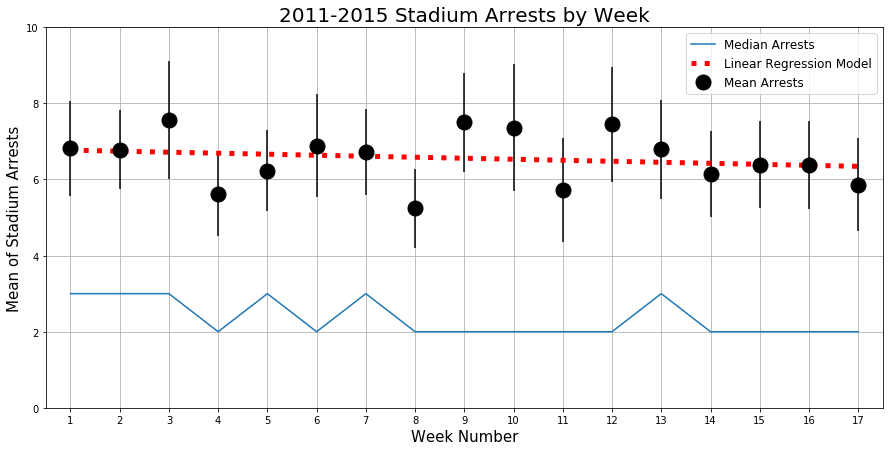

In [126]:
# Plot sample means with error bars
fig, ax = plt.subplots(figsize=(15,7))

ax.errorbar(weeks, byWeek_mean, yerr=byWeek_sem, fmt = 'o', color="k",
            markersize=15, alpha=1, label="Mean Arrests", ecolor='k')

ax.plot(np.arange(1, week_count + 1), byWeek_median, label='Median Arrests')

ax.plot(weeks, weekly_fit, linestyle=':', linewidth=5, color='r', label='Linear Regression Model')

ax.set_xlim(0.5, week_count + .5)
ax.set_ylim(0,10)

ax.set_xlabel("Week Number", fontsize=15)
ax.set_ylabel("Mean of Stadium Arrests", fontsize=15)
ax.set_title("2011-2015 Stadium Arrests by Week", fontsize = 20)
ax.set_xticks(weeks)

plt.legend(loc="best", fontsize="large", fancybox=True)

plt.grid()

plt.savefig('Arrests by Week.png')

plt.show()

## byWeek Comments:
This data set does not really show anything exciting, but well worth investigating.
* The middle of the season generally have the highest arrests (exception are week 7 and week 10). 
    ~ is it possible the highest offending teams had a bye during that week.

## Add a season Parameter into the mix:
Make a subplot of all the seasons by week

In [57]:
# Create a new dataframe that shows season by week arrest average.

season_group = nfl_arrests.groupby(['season', 'week_num'])

season_mean_arrests = season_group.mean()['arrests'].unstack(level=0)
season_median_arrests = season_group.median()['arrests'].unstack(level=0)
season_sem_arrests = season_group.sem()['arrests'].unstack(level=0)


season_mean_arrests


season,2011,2012,2013,2014,2015
week_num,,,,,
1,5.846154,8.454545,10.272727,2.846154,7.500000
2,6.800000,7.076923,5.357143,8.692308,6.000000
3,6.181818,8.666667,8.307692,7.800000,6.750000
4,4.642857,4.500000,8.750000,7.363636,3.700000
5,5.111111,6.090909,4.181818,8.538462,6.583333
6,8.272727,6.454545,4.666667,6.600000,9.000000
7,6.285714,5.100000,7.461538,6.750000,7.545455
8,3.909091,6.200000,5.125000,6.000000,4.875000
9,8.250000,9.090909,4.900000,7.363636,7.600000


In [58]:
# Test functions to make an array of all 17 weeks for plotting.

len(season_sem_arrests)

np.full((1,17), season_mean_arrests[2011].max())
np.arange(1, len(season_mean_arrests)+1)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

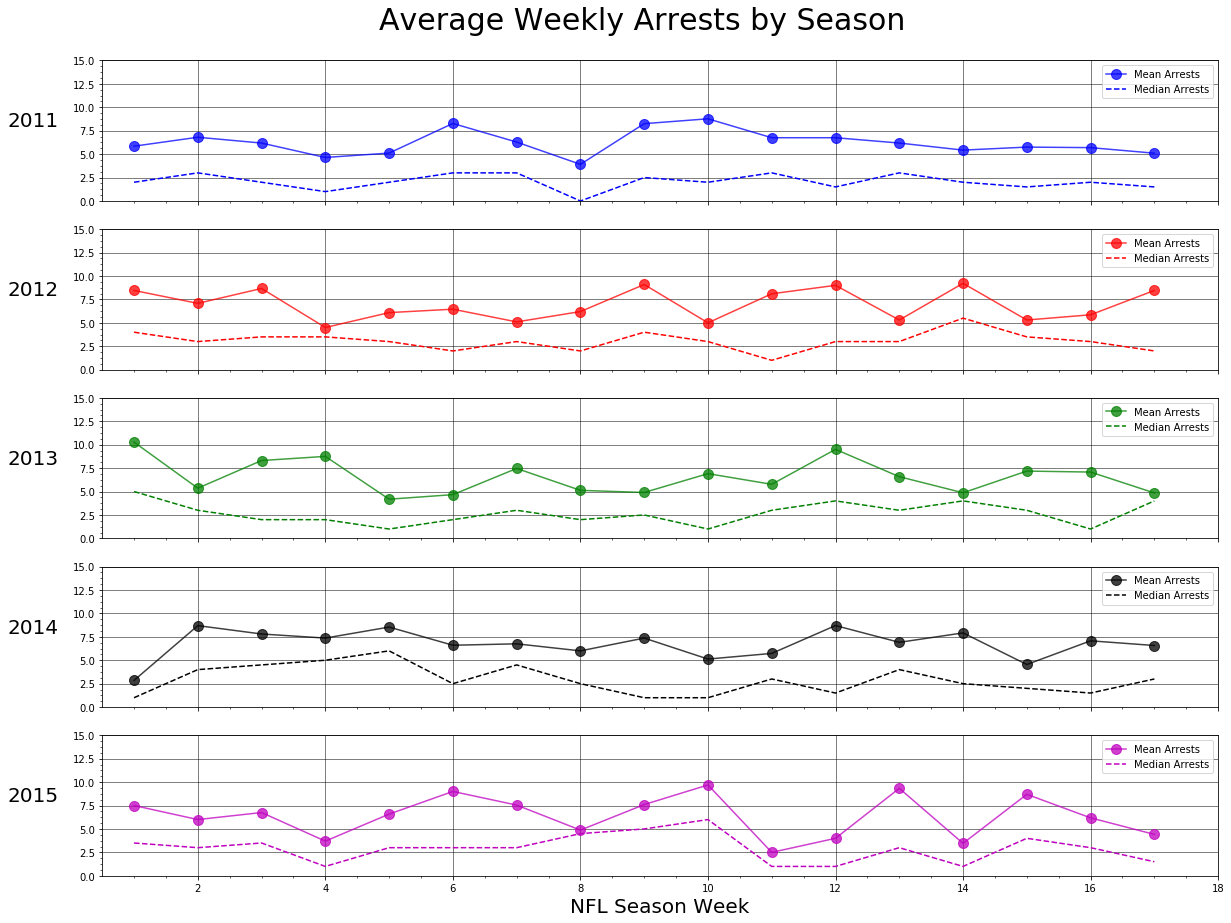

In [127]:
# Make a subplot 5 rows of plots... 
# Share the same x-axis and y_lims are the same for each

fig, axes = plt.subplots(nrows=5, ncols=1, sharex=True, figsize=(20, 15))

colors = ['b', 'r', 'g', 'k', 'm']

for row_plot in range(0,len(axes)):
    
    # current year to plot
    year = 2011 + row_plot
    
    # weeks in season
    weeks = np.arange(1, len(season_mean_arrests)+1)
    
    # plot of errorbar
    axes[row_plot].plot(weeks, season_mean_arrests[year],
                            marker='o', markersize=10, color=colors[row_plot],
                            alpha=0.75, label="Mean Arrests")
    
    # Median Plot
    
    # max_line = np.full((17,1), season_mean_arrests[year].max())
    axes[row_plot].plot(weeks,season_median_arrests[year], linewidth=1.5, linestyle='--',
                        label="Median Arrests", color=colors[row_plot], alpha=1)

    # set axes limits
    axes[row_plot].set_xlim(0.5, len(season_mean_arrests)+1)
    axes[row_plot].set_ylim(0,15)

    # Set ylabel
    
    axes[row_plot].set_ylabel(year, rotation=0, fontsize=20, labelpad=40)

    # set grid parameters

    axes[row_plot].minorticks_on()
    
    axes[row_plot].grid(which='major', linestyle='-', linewidth='0.5', color='black')
    
    axes[row_plot].legend()
    
axes[row_plot].set_xlabel('NFL Season Week', fontsize=20)
    
fig.suptitle('Average Weekly Arrests by Season', fontsize=30, y=.93)

plt.savefig('Average Weekly Arrests By Season.png')

plt.show()

# Is there any noticable patterns in the seasonal occurances?

Make a box pot of the average number of arrests by season. This will transition into specific team analysis.

In [60]:
nfl_arrests.head()

,season,week_num,day_of_week,gametime_local,home_team,away_team,home_score,away_score,OT_flag,arrests,division_game
0,2011,1,Sunday,1:15:00 PM,Arizona,Carolina,28,21,NaN,5.0,n
1,2011,4,Sunday,1:05:00 PM,Arizona,New York Giants,27,31,NaN,6.0,n
2,2011,7,Sunday,1:05:00 PM,Arizona,Pittsburgh,20,32,NaN,9.0,n
3,2011,9,Sunday,2:15:00 PM,Arizona,St. Louis,19,13,OT,6.0,y
4,2011,13,Sunday,2:15:00 PM,Arizona,Dallas,19,13,OT,3.0,n


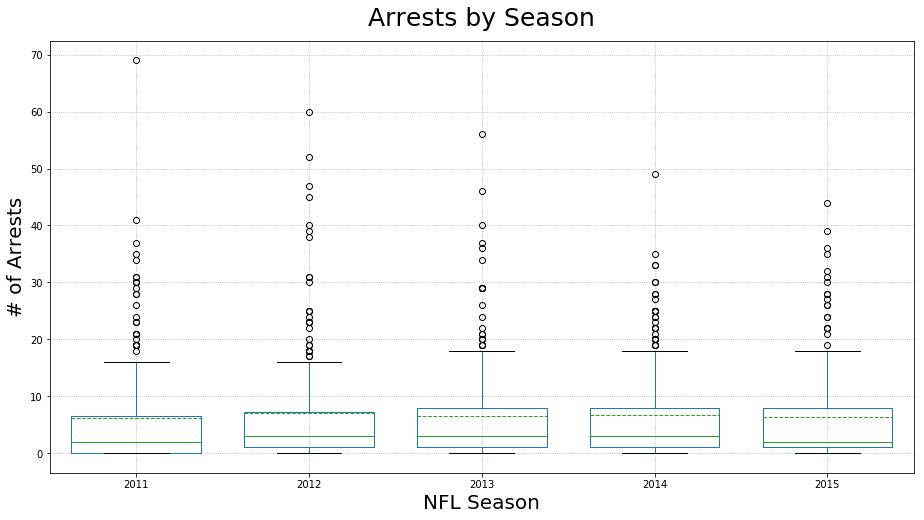

In [128]:
# Create a simple boxplot of the seasonal arrest averages

fig, ax = plt.subplots(figsize=(15,8))

nfl_arrests.boxplot(column='arrests',by='season', ax=ax, widths=.75, showmeans=True, meanline=True)

ax.set_xlabel('NFL Season', fontsize=20)
ax.set_ylabel('# of Arrests', fontsize=20)
ax.set_title('Arrests by Season', fontsize=25, pad=15)

plt.suptitle("")

plt.grid(linestyle=':')

plt.savefig('Arrests by Season boxplot.png')
plt.show()


## bySeason Comments: 

In all seasons, there are a significant number of outliers above the maximum. This means:
* The average number of arrests per season is higher than the median number of arrests.
    - In some seasons, the average is almost at the third Quartile of the dataset. (ex. 2012)
* If the Median arrests is normally below 5, A good portion of the season is relatively tame.

## Is there any trends in the Outliers?

According to the boxplot, there is a significant number of games outside the predicted region. Hence, we should look at these outliers to gather intel on certain teams.

In [62]:
# Find the outliers according to the boxplot for season total and find how many times an outliers over a season occured.

# outliers are 3xIQR
# Suspected outliers are 1.5xIQR

Q1 = nfl_arrests['arrests'].quantile(0.25)
Q3 = nfl_arrests['arrests'].quantile(0.75)
IQR = Q3 - Q1
IQR

7.0

In [63]:
# Since there are no outliers below the median, we only need to analyze the maximum. 

majorOutliers = nfl_arrests.loc[nfl_arrests['arrests'] > (3*IQR) + Q3]
# suspectedOutliers = nfl_arrests.loc[nfl_arrests['arrests'] >= (1.5*IQR) + Q3]

#left suspected outliers out because there 114 instances which fell into suspected outlier category

majorOutliers

,season,week_num,day_of_week,gametime_local,home_team,away_team,home_score,away_score,OT_flag,arrests,division_game
575,2011,13,Sunday,4:15:00 PM,New York Giants,Green Bay,35,38,NaN,35.0,n
576,2011,15,Sunday,1:00:00 PM,New York Giants,Washington,10,23,NaN,31.0,y
578,2012,1,Wednesday,8:20:00 PM,New York Giants,Dallas,17,24,NaN,39.0,y
591,2013,12,Sunday,4:25:00 PM,New York Giants,Dallas,21,24,NaN,46.0,y
599,2014,12,Sunday,8:30:00 PM,New York Giants,Dallas,28,31,NaN,33.0,y
605,2015,7,Sunday,4:25:00 PM,New York Giants,Dallas,27,20,NaN,35.0,y
607,2015,13,Sunday,1:00:00 PM,New York Giants,New York Jets,20,23,OT,39.0,n
608,2015,15,Sunday,1:00:00 PM,New York Giants,Carolina,35,38,NaN,31.0,n
610,2011,1,Sunday,8:20:00 PM,New York Jets,Dallas,27,24,NaN,34.0,n
614,2011,10,Sunday,8:20:00 PM,New York Jets,New England,16,37,NaN,30.0,y


In [64]:
# Create a group for major outliers by team
byHome_outliers = majorOutliers.groupby('home_team')

# Sort the group by number of occurances
home_count = byHome_outliers['arrests'].count()
home_count.sort_values(ascending=False, inplace=True)
home_count

home_team
San Diego          13
New York Giants     8
New York Jets       7
Pittsburgh          6
San Francisco       3
Oakland             2
Name: arrests, dtype: int64

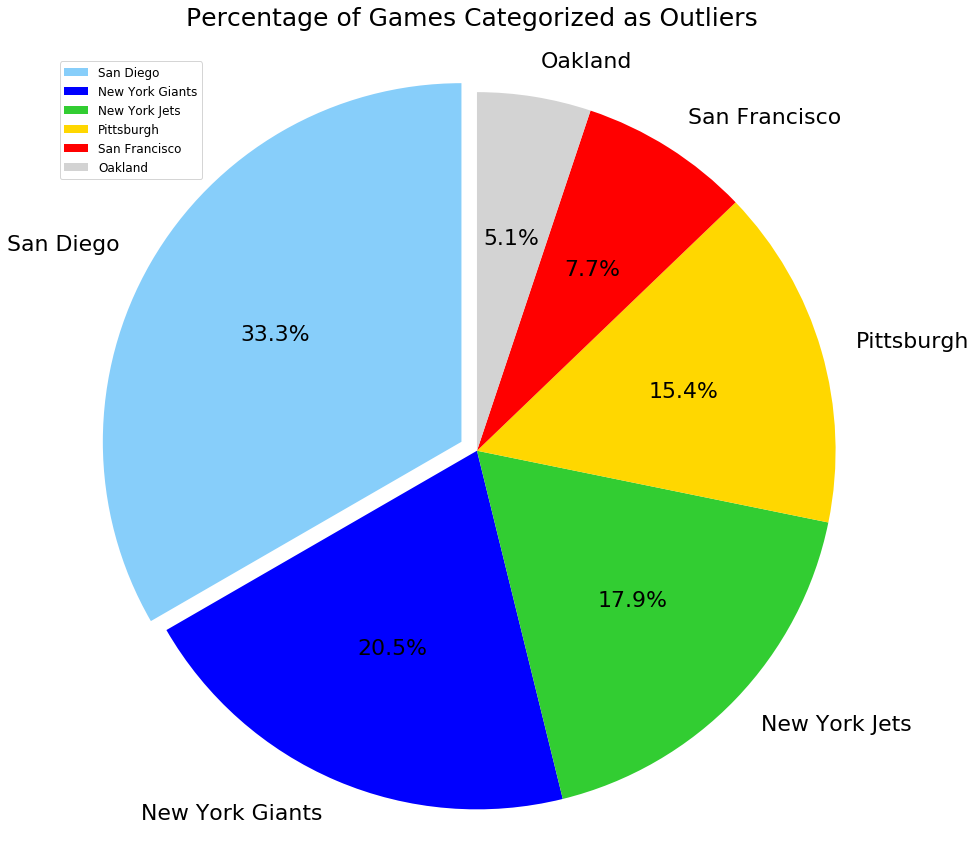

In [129]:
# Make a pie chart showcasing the major outliers:

# Define explodes and colors in pie chart
explode = (0.05, 0, 0, 0, 0, 0)
colors = ['lightskyblue', 'blue', 'limegreen', 'gold', 'red', 'lightgray']

# plot chart
fig, ax = plt.subplots(figsize=(12,12))

home_count.plot(kind='pie', colors=colors, ax=ax, explode=explode,
                autopct='%1.1f%%', startangle=90, shadow=False, legend=True, fontsize=22)



# remove default ylabel and set title
ax.set_ylabel('')
ax.set_title('Percentage of Games Categorized as Outliers', fontsize='25', pad=30)

ax.legend(loc=2, fontsize=12, fancybox=True)
ax.axis('equal')

plt.tight_layout()

plt.savefig('Outlier Games by Team.png')
plt.show()

## Outliers Comments:

* Chargers are the highest offending team followed by Giants and Jets (Who both play at the same stadium.) Deeper analysis of these teams should be investigated. 
    - Are they mainly division games? 
    - Are there certain away teams that result in more arrests.
    - Is the season team record related in any way?
    
    - (In the case of Giants & Jets, we should check when they play eachother.)
    
    
    
* Reach Question:
    * Does SanDiego/NewYork have more crime compared to other major US Cities in the dataset?
    

## Take a look at the Record on the season for any coorelation: 

* If the record on the season ends up being low/high, are there more arrests due to frustration/excitment? 
    - More specifially, check out the records for the outlier teams shown above.

Reach - Predict using simple machine learning to predict arrests at stadiums not provided. 

### Need to import NFL_records.csv into the mix.

In [66]:
nfl_records = pd.read_csv('NFL_Records.csv')

In [67]:
nfl_records.head()

,Team,2011,2012,2013,2014,2015
0,Arizona,0.500,0.313,0.625,0.500,0.813
1,Atlanta,0.625,0.813,0.250,0.375,0.500
2,Baltimore,0.750,0.625,0.500,0.625,0.313
3,Buffalo,0.375,0.375,0.375,0.563,0.500
4,Carolina,0.375,0.438,0.750,0.468,0.938


In [68]:
nfl_arrests.head()

,season,week_num,day_of_week,gametime_local,home_team,away_team,home_score,away_score,OT_flag,arrests,division_game
0,2011,1,Sunday,1:15:00 PM,Arizona,Carolina,28,21,NaN,5.0,n
1,2011,4,Sunday,1:05:00 PM,Arizona,New York Giants,27,31,NaN,6.0,n
2,2011,7,Sunday,1:05:00 PM,Arizona,Pittsburgh,20,32,NaN,9.0,n
3,2011,9,Sunday,2:15:00 PM,Arizona,St. Louis,19,13,OT,6.0,y
4,2011,13,Sunday,2:15:00 PM,Arizona,Dallas,19,13,OT,3.0,n


In [69]:
nfl_merged = pd.merge(nfl_arrests, nfl_records, how='left',
                      left_on='home_team', right_on='Team').drop(columns=['Team'])

nfl_merged.rename(columns={'2011':'WinPct 2011', '2012':'WinPct 2012',
                           '2013':'WinPct 2013', '2014':'WinPct 2014', '2015':'WinPct 2015'}, inplace=True)

nfl_merged.head()

,season,week_num,day_of_week,gametime_local,home_team,away_team,home_score,away_score,OT_flag,arrests,division_game,WinPct 2011,WinPct 2012,WinPct 2013,WinPct 2014,WinPct 2015
0,2011,1,Sunday,1:15:00 PM,Arizona,Carolina,28,21,NaN,5.0,n,0.5,0.313,0.625,0.5,0.813
1,2011,4,Sunday,1:05:00 PM,Arizona,New York Giants,27,31,NaN,6.0,n,0.5,0.313,0.625,0.5,0.813
2,2011,7,Sunday,1:05:00 PM,Arizona,Pittsburgh,20,32,NaN,9.0,n,0.5,0.313,0.625,0.5,0.813
3,2011,9,Sunday,2:15:00 PM,Arizona,St. Louis,19,13,OT,6.0,y,0.5,0.313,0.625,0.5,0.813
4,2011,13,Sunday,2:15:00 PM,Arizona,Dallas,19,13,OT,3.0,n,0.5,0.313,0.625,0.5,0.813


## Create a plot to show Seasonal Team Averages vs. Average number of arrests per game:

In [70]:
nfl_merged.head()

,season,week_num,day_of_week,gametime_local,home_team,away_team,home_score,away_score,OT_flag,arrests,division_game,WinPct 2011,WinPct 2012,WinPct 2013,WinPct 2014,WinPct 2015
0,2011,1,Sunday,1:15:00 PM,Arizona,Carolina,28,21,NaN,5.0,n,0.5,0.313,0.625,0.5,0.813
1,2011,4,Sunday,1:05:00 PM,Arizona,New York Giants,27,31,NaN,6.0,n,0.5,0.313,0.625,0.5,0.813
2,2011,7,Sunday,1:05:00 PM,Arizona,Pittsburgh,20,32,NaN,9.0,n,0.5,0.313,0.625,0.5,0.813
3,2011,9,Sunday,2:15:00 PM,Arizona,St. Louis,19,13,OT,6.0,y,0.5,0.313,0.625,0.5,0.813
4,2011,13,Sunday,2:15:00 PM,Arizona,Dallas,19,13,OT,3.0,n,0.5,0.313,0.625,0.5,0.813


In [71]:
year = 2011
winpct_string = 'WinPct ' + str(year)
nfl_merged[winpct_string]

0      0.500
1      0.500
2      0.500
3      0.500
4      0.500
5      0.500
6      0.500
7      0.500
8      0.500
9      0.500
10     0.500
11     0.500
12     0.500
13     0.500
14     0.500
15     0.500
16     0.500
17     0.500
18     0.500
19     0.500
20     0.500
21     0.500
22     0.500
23     0.500
24     0.500
25     0.500
26     0.500
27     0.500
28     0.500
29     0.500
       ...  
936    0.313
937    0.313
938    0.313
939    0.313
940    0.313
941    0.313
942    0.313
943    0.313
944    0.313
945    0.313
946    0.313
947    0.313
948    0.313
949    0.313
950    0.313
951    0.313
952    0.313
953    0.313
954    0.313
955    0.313
956    0.313
957    0.313
958    0.313
959    0.313
960    0.313
961    0.313
962    0.313
963    0.313
964    0.313
965    0.313
Name: WinPct 2011, Length: 966, dtype: float64

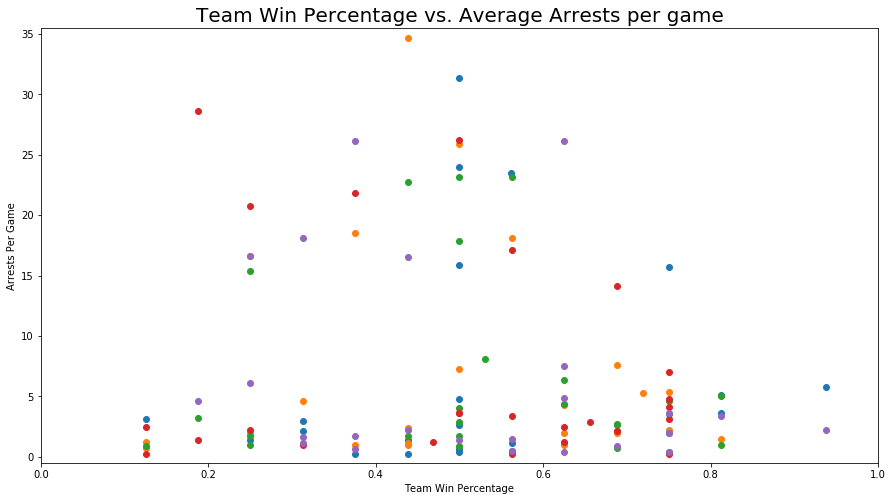

In [72]:
# Plot figure
fig, ax = plt.subplots(figsize=(15,8))

year_list = [2011, 2012, 2013, 2014, 2015]

for year in year_list:
    
    # Define x axis as the season average      
    x_axis = 'WinPct ' + str(year)
    
    # Extract seasonal data: 
    nfl_merged_yearly = nfl_merged.loc[nfl_merged['season'] == year]
    
    # Group the seasonal data by the home_team and find the mean.
    byHomeYearly = nfl_merged_yearly.groupby('home_team').mean()
    
    ax.scatter(data=byHomeYearly, x=x_axis, y='arrests', marker = 'o', )

# Rotate x-axis and set y limit

ax.set_xlim(0,1)
ax.set_ylim(-.5, 35.5)
ax.set_xlabel('Team Win Percentage')
ax.set_ylabel('Arrests Per Game')
ax.set_title('Team Win Percentage vs. Average Arrests per game', fontsize=20)

plt.show()

### byRecord comments: 

This plot infers there could be a cooreation with the seasonal record, though its not too convincing. 
* The higher performing teams do seem to have less arrests, however the really poor teams seem to have less arrests as well.
    - Once the Win Percentage goes below .6, the chances of having more arrests seems to increase.

## Take a look at some specific teams to see how their records compares to the arrests: 

Lets take a look at these teams (San Diego, Seattle, Philadelphia, Denver, Giants)

In [73]:
byHome = nfl_merged.groupby('home_team')
byHome.mean().sort_values(by='arrests')

# WE find Seattle has the least, San Diego has the most, and Denver has the middle. 

,season,week_num,home_score,away_score,arrests,WinPct 2011,WinPct 2012,WinPct 2013,WinPct 2014,WinPct 2015
home_team,,,,,,,,,,
Seattle,2013.000000,9.600000,26.600000,15.825000,0.800000,0.438,0.688,0.813,0.750,0.625
Chicago,2012.500000,8.687500,22.937500,21.187500,0.812500,0.500,0.625,0.500,0.313,0.375
Tampa Bay,2013.051282,8.641026,19.564103,24.230769,0.846154,0.250,0.438,0.250,0.125,0.375
Houston,2013.000000,9.075000,23.225000,20.075000,1.000000,0.625,0.750,0.125,0.563,0.563
Carolina,2013.000000,8.700000,23.750000,19.150000,1.375000,0.375,0.438,0.750,0.468,0.938
Cincinnati,2013.000000,9.375000,25.975000,19.550000,1.425000,0.563,0.625,0.688,0.656,0.750
Baltimore,2013.258065,9.548387,22.870968,18.322581,1.483871,0.750,0.625,0.500,0.625,0.313
Jacksonville,2012.918919,9.189189,16.567568,23.405405,1.729730,0.313,0.125,0.250,0.188,0.313
Kansas City,2012.948718,9.333333,19.358974,19.794872,1.820513,0.438,0.125,0.688,0.563,0.688


In [74]:
year_list = [2011, 2012, 2013, 2014, 2015]
col_list = []
for year in year_list:
    col_list.append('WinPct '+str(year))

    # Find the total WinPCT for each team
nfl_merged['Total WinPct'] = nfl_merged[col_list].sum(axis=1)/5
nfl_merged.tail()

,season,week_num,day_of_week,gametime_local,home_team,away_team,home_score,away_score,OT_flag,arrests,division_game,WinPct 2011,WinPct 2012,WinPct 2013,WinPct 2014,WinPct 2015,Total WinPct
961,2015,7,Sunday,1:00:00 PM,Washington,Tampa Bay,31,30,NaN,2.0,n,0.313,0.625,0.188,0.25,0.563,0.3878
962,2015,10,Sunday,1:00:00 PM,Washington,New Orleans,47,14,NaN,2.0,n,0.313,0.625,0.188,0.25,0.563,0.3878
963,2015,12,Sunday,1:00:00 PM,Washington,New York Giants,20,14,NaN,2.0,y,0.313,0.625,0.188,0.25,0.563,0.3878
964,2015,13,Monday,8:30:00 PM,Washington,Dallas,16,19,NaN,4.0,y,0.313,0.625,0.188,0.25,0.563,0.3878
965,2015,15,Sunday,1:00:00 PM,Washington,Buffalo,35,25,NaN,1.0,n,0.313,0.625,0.188,0.25,0.563,0.3878


In [75]:
byHome = nfl_merged.groupby('home_team')
byHome = byHome.mean().sort_values(by='Total WinPct')
byHome

,season,week_num,home_score,away_score,arrests,WinPct 2011,WinPct 2012,WinPct 2013,WinPct 2014,WinPct 2015,Total WinPct
home_team,,,,,,,,,,,
Jacksonville,2012.918919,9.189189,16.567568,23.405405,1.729730,0.313,0.125,0.250,0.188,0.313,0.2378
Tampa Bay,2013.051282,8.641026,19.564103,24.230769,0.846154,0.250,0.438,0.250,0.125,0.375,0.2876
Oakland,2012.918919,9.000000,20.891892,27.270270,17.783784,0.500,0.250,0.250,0.188,0.438,0.3252
Tennessee,2013.000000,9.125000,19.950000,24.975000,2.075000,0.563,0.375,0.438,0.125,0.188,0.3378
Washington,2013.000000,9.125000,22.550000,24.775000,2.675000,0.313,0.625,0.188,0.250,0.563,0.3878
Miami,2013.451613,10.129032,21.612903,21.451613,2.387097,0.375,0.438,0.500,0.500,0.375,0.4376
New York Jets,2013.000000,8.375000,22.325000,21.450000,21.450000,0.500,0.375,0.500,0.250,0.625,0.4500
New York Giants,2013.000000,9.225000,25.725000,23.550000,22.475000,0.562,0.563,0.438,0.375,0.375,0.4626
Chicago,2012.500000,8.687500,22.937500,21.187500,0.812500,0.500,0.625,0.500,0.313,0.375,0.4626


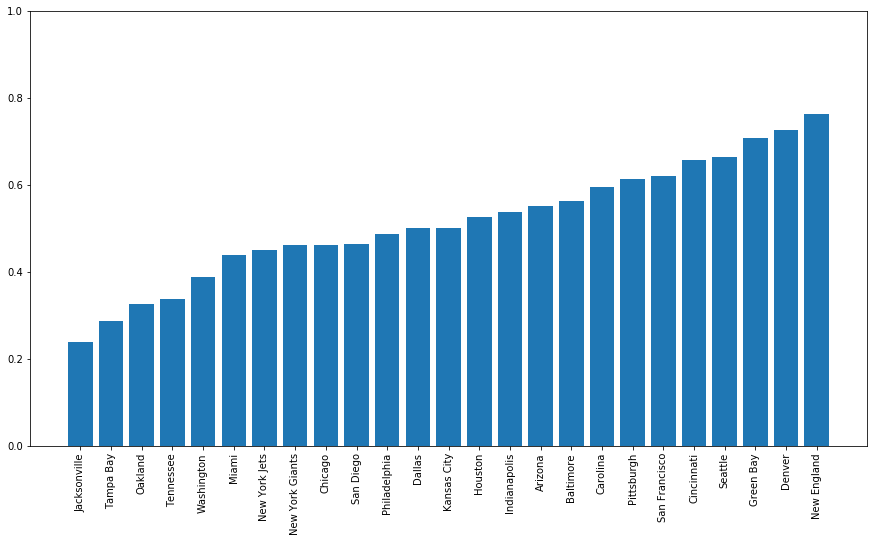

In [76]:
x_axis = np.arange(0, len(byHome))

# Plot figure
fig, ax = plt.subplots(figsize=(15,8))
ax.bar(data=byHome, x=byHome.index, height='Total WinPct', align='center')

# Rotate x-axis and set y limit
ax.set_ylim(0,1)
plt.xticks(rotation='vertical')

plt.show()

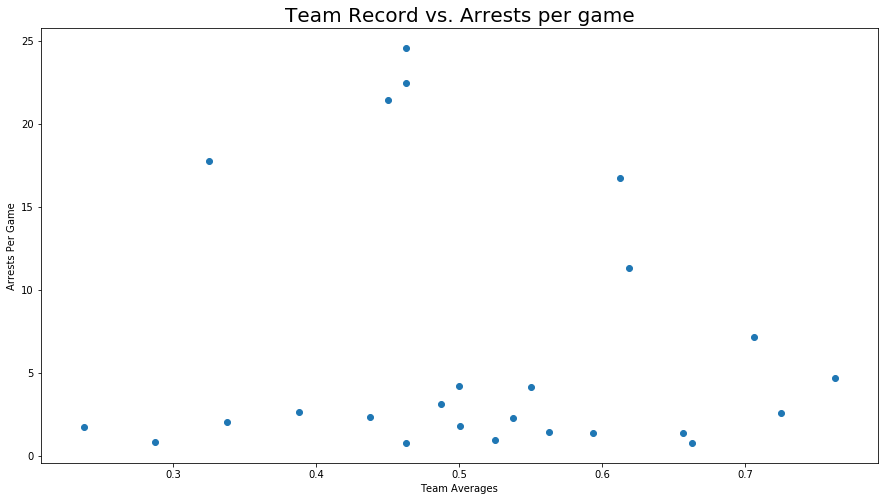

In [77]:
# Now make a scatter plot with team record on the x_axis, and arrest average on the y_axis

# Plot figure
fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(data=byHome, x='Total WinPct', y='arrests', marker='o')

# Rotate x-axis and set y limit

ax.set_ylim = (0,1)
ax.set_xlabel('Team Averages')
ax.set_ylabel('Arrests Per Game')
ax.set_title('Team Record vs. Arrests per game', fontsize=20)

plt.show()

## byTotalRecord Comments: 
Very similar to the seasonal plot, but this plot takes into account 5 years of home-team records. This shows there are some franchises that have many more arrests than others. However most fall around 5 of less. 
* Certain FanBases seem to have more arrests than most. San DIego, New York, Pittsburgh. 

## Lets try and pull population data from an API and see if there is any correlation.

In [78]:
import json
import requests
from config import *

In [79]:
# api.census.gov/data/2017/pep/population?get=POP,GEONAME&for=region:*&DATE=9&key=YOUR_KEY
url = 'http://api.census.gov/data/2017/pep/population'
API_KEY

'30a6e1f24a4e9dd5f2fdf550a883c110131740b3'

In [80]:
city_query = 'get=POP,GEONAME&for='
city = 'Denver'
date_query = '&DATE=9&key='

query_url = url + city_query + city + date_query + API_KEY
query_url

ex_query = 'api.census.gov/data/2017/pep/population?get=POP,GEONAME&for=region:*&DATE=9&key='

In [81]:
pop_response = requests.get(ex_query + API_KEY)
print(pop_response)

InvalidSchema: No connection adapters were found for 'api.census.gov/data/2017/pep/population?get=POP,GEONAME&for=region:*&DATE=9&key=30a6e1f24a4e9dd5f2fdf550a883c110131740b3'

## Using Census API not Working properly:

Difficulty working with US Census API format. Unable to pull population by city, and would require external info for zip codes.

## Lets instead use a dataset as a csv with population of major us cities: 
* Will need to account for cases where the team is not in the city.
    - For example, New England is 40 minutes away from Boston. Might not be an accurate rep, but worth a shot.

In [82]:
# Import city population data and drop unnecessary columns
pop_data = pd.read_csv('Population_Data.csv')
pop_data.drop(columns=['Rank', '2018 Population', '2010 Census', 'Change', '2018 Density'], inplace=True)
pop_data

,Name,State,2016 Population
0,New York,New York,8537673
1,Los Angeles,California,3976322
2,Chicago,Illinois,2704958
3,Houston,Texas,2303482
4,Phoenix,Arizona,1615017
5,Philadelphia,Pennsylvania,1567872
6,San Antonio,Texas,1492510
7,San Diego,California,1406630
8,Dallas,Texas,1317929
9,San Jose,California,1025350


In [83]:
nfl_merged.head()

,season,week_num,day_of_week,gametime_local,home_team,away_team,home_score,away_score,OT_flag,arrests,division_game,WinPct 2011,WinPct 2012,WinPct 2013,WinPct 2014,WinPct 2015,Total WinPct
0,2011,1,Sunday,1:15:00 PM,Arizona,Carolina,28,21,NaN,5.0,n,0.5,0.313,0.625,0.5,0.813,0.5502
1,2011,4,Sunday,1:05:00 PM,Arizona,New York Giants,27,31,NaN,6.0,n,0.5,0.313,0.625,0.5,0.813,0.5502
2,2011,7,Sunday,1:05:00 PM,Arizona,Pittsburgh,20,32,NaN,9.0,n,0.5,0.313,0.625,0.5,0.813,0.5502
3,2011,9,Sunday,2:15:00 PM,Arizona,St. Louis,19,13,OT,6.0,y,0.5,0.313,0.625,0.5,0.813,0.5502
4,2011,13,Sunday,2:15:00 PM,Arizona,Dallas,19,13,OT,3.0,n,0.5,0.313,0.625,0.5,0.813,0.5502


In [84]:
pop_data[pop_data['State'] == 'Tennessee']

,Name,State,2016 Population
22,Nashville,Tennessee,660388
27,Memphis,Tennessee,652717


In [85]:
# Green_bay will be a major exception, as it is not really that close to Milwalkie, but has a massive fanbase.

In [86]:
# Match the population numbers with the home team name: 

# Adssumptions have to be made
exception_dict = {'New England':'Boston', 'Green Bay':'Milwaukee ', 'Carolina':'Charlotte',
                  'Arizona':'Phoenix', 'Tennessee':'Nashville', 'Tampa Bay': 'Tampa', 'Washington':'Washington DC DC',
                 'New York Giants': 'New York ', 'New York Jets': 'New York '}

population_home = []

for team in range(0,len(byHome.index)):
    
    if byHome.index[team] in pop_data['Name'].to_dict().values():
        
        pop = pop_data[pop_data['Name'] == byHome.index[team]]['2016 Population'].values[0]
        population_home.append((byHome.index[team], pop))
        
    elif byHome.index[team]+' ' in pop_data['Name'].to_dict().values():
        
        pop = pop_data[pop_data['Name'] == byHome.index[team]+' ']['2016 Population'].values[0]
        population_home.append((byHome.index[team], pop))
        
    elif byHome.index[team] in exception_dict.keys():
        
        exc_team = exception_dict[byHome.index[team]]
        pop = pop_data[pop_data['Name'] == exc_team]['2016 Population'].values[0]
        population_home.append((byHome.index[team],pop))

    else:
        print(byHome.index[team])
        
population_home = pd.DataFrame(population_home, columns=['home_team','population'])
        

In [87]:
# Merge the dataframe into nfl_merged

nfl_merged2pop = pd.merge(nfl_merged, population_home, how='left', on='home_team')
nfl_merged2pop

,season,week_num,day_of_week,gametime_local,home_team,away_team,home_score,away_score,OT_flag,arrests,division_game,WinPct 2011,WinPct 2012,WinPct 2013,WinPct 2014,WinPct 2015,Total WinPct,population
0,2011,1,Sunday,1:15:00 PM,Arizona,Carolina,28,21,NaN,5.0,n,0.500,0.313,0.625,0.50,0.813,0.5502,1615017
1,2011,4,Sunday,1:05:00 PM,Arizona,New York Giants,27,31,NaN,6.0,n,0.500,0.313,0.625,0.50,0.813,0.5502,1615017
2,2011,7,Sunday,1:05:00 PM,Arizona,Pittsburgh,20,32,NaN,9.0,n,0.500,0.313,0.625,0.50,0.813,0.5502,1615017
3,2011,9,Sunday,2:15:00 PM,Arizona,St. Louis,19,13,OT,6.0,y,0.500,0.313,0.625,0.50,0.813,0.5502,1615017
4,2011,13,Sunday,2:15:00 PM,Arizona,Dallas,19,13,OT,3.0,n,0.500,0.313,0.625,0.50,0.813,0.5502,1615017
5,2011,14,Sunday,2:05:00 PM,Arizona,San Francisco,21,19,NaN,4.0,y,0.500,0.313,0.625,0.50,0.813,0.5502,1615017
6,2011,15,Sunday,2:15:00 PM,Arizona,Cleveland,20,17,OT,1.0,n,0.500,0.313,0.625,0.50,0.813,0.5502,1615017
7,2011,17,Sunday,2:15:00 PM,Arizona,Seattle,23,20,OT,4.0,y,0.500,0.313,0.625,0.50,0.813,0.5502,1615017
8,2012,1,Sunday,1:25:00 PM,Arizona,Seattle,20,16,NaN,0.0,y,0.500,0.313,0.625,0.50,0.813,0.5502,1615017
9,2012,3,Sunday,1:05:00 PM,Arizona,Philadelphia,27,6,NaN,12.0,n,0.500,0.313,0.625,0.50,0.813,0.5502,1615017


In [106]:
# Create groupby for each team by population
byTeam_Pop = nfl_merged2pop.groupby(by='home_team').mean()

# make an easy array of the number of teams in the dataset
team_index_list = np.arange(0,len(byTeam_Pop))


byTeam_Pop['arrests'].values[team_index_list]

array([ 4.15      ,  1.48387097,  1.375     ,  0.8125    ,  1.425     ,
        4.225     ,  2.625     ,  7.2       ,  1.        ,  2.275     ,
        1.72972973,  1.82051282,  2.38709677,  4.7       , 22.475     ,
       21.45      , 17.78378378,  3.15      , 16.75      , 24.575     ,
       11.35      ,  0.8       ,  0.84615385,  2.075     ,  2.675     ])

In [109]:
pop_slope, pop_int, pop_r, pop_p, pop_std_err = stats.linregress(
    byTeam_Pop['arrests'].values[team_index_list], byTeam_Pop['population'].values[team_index_list])

# Find max arrest average and set the regression limit to that
max_arrests = round(byTeam_Pop['arrests'].max())

pop_fit = pop_slope * np.arange(0,max_arrests) + pop_int

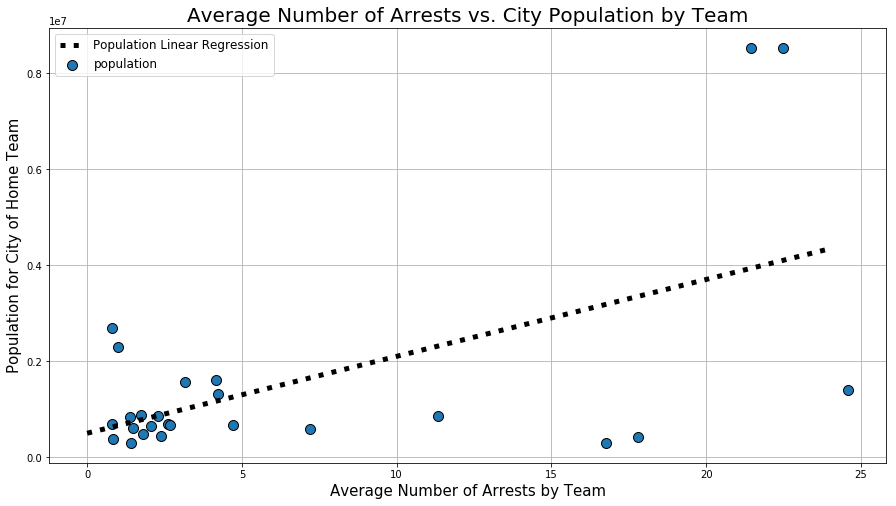

In [125]:
# Plot the figure and regression model

figure, ax = plt.subplots(figsize=(15,8))

ax.scatter(data=byTeam_Pop, x='arrests', y='population', marker='o', s=100, edgecolors='k')

ax.plot(np.arange(0,max_arrests), pop_fit, linestyle=':', linewidth=5, color='k', label='Population Linear Regression')

ax.set_xlabel("Average Number of Arrests by Team", fontsize=15)
ax.set_ylabel("Population for City of Home Team", fontsize=15)
ax.set_title("Average Number of Arrests vs. City Population by Team", fontsize = 20)

plt.legend(loc="best", fontsize="large", fancybox=True)

plt.grid()

plt.savefig('City_POP vs Arrests by City.png')

plt.show()